In [1]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules, rule_to_conditions, index_rules, combine_rule_conditions, simplify_rules

def plot_helper(rules, to_consider, df, obj_names, target_category):

    rules_list = [rules[i][0] for i in to_consider]

    cons = combine_rule_conditions(rules_list)
    df["mark"] = df.apply(cons, axis=1)

    plot_rule_explanations(df, obj_names, "mark", "category", target_category, title=f"{simplify_rules(rules_list)}")

## Vehicle crash worthiness
### Skope rules

In [2]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.2}  # use F1-Score
classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall, F1-score)
0: x2 > 1.65697 and x3 <= 2.75995 and x4 <= 1.4856 --> ('0.615', '0.704', '0.657')
1: x2 > 1.65783 and x4 <= 1.50908 --> ('0.578', '0.760', '0.656')
2: x1 <= 2.18671 and x2 > 1.65709 and x4 <= 1.48396 --> ('0.739', '0.589', '0.656')
3: x2 > 1.65496 and x4 <= 1.4856 --> ('0.583', '0.748', '0.656')
4: x1 <= 2.18671 and x2 > 1.65709 and x4 <= 1.5022 --> ('0.691', '0.617', '0.652')
5: x1 <= 1.8912 and x4 <= 1.50904 --> ('0.659', '0.616', '0.637')
6: x1 <= 2.18671 and x2 > 1.65487 and x4 <= 1.4856 --> ('0.723', '0.556', '0.628')
7: x1 <= 2.08604 and x2 > 1.64521 and x4 <= 1.50904 --> ('0.757', '0.517', '0.615')
8: x1 <= 2.06765 and x2 > 1.64842 and x4 <= 1.4856 --> ('0.731', '0.529', '0.614')
9: x1 <= 2.06705 and x4 <= 1.34742 --> ('0.683', '0.547', '0.607')
10: x1 <= 2.03843 and x4 <= 1.4856 --> ('0.603', '0.612', '0.607')
11: x1 <= 1.89295 and x4 <= 1.50848 --> ('0.641', '0.575', '0.606')
12: x2 > 1.64727 and x4 <= 1.32149 --> ('0.649', '0.558', '0.60

True positives  = 1906 / 2726
True negatives  = 16158 / 17274
False positives = 1116 / 3022
False negatives = 820 / 16978


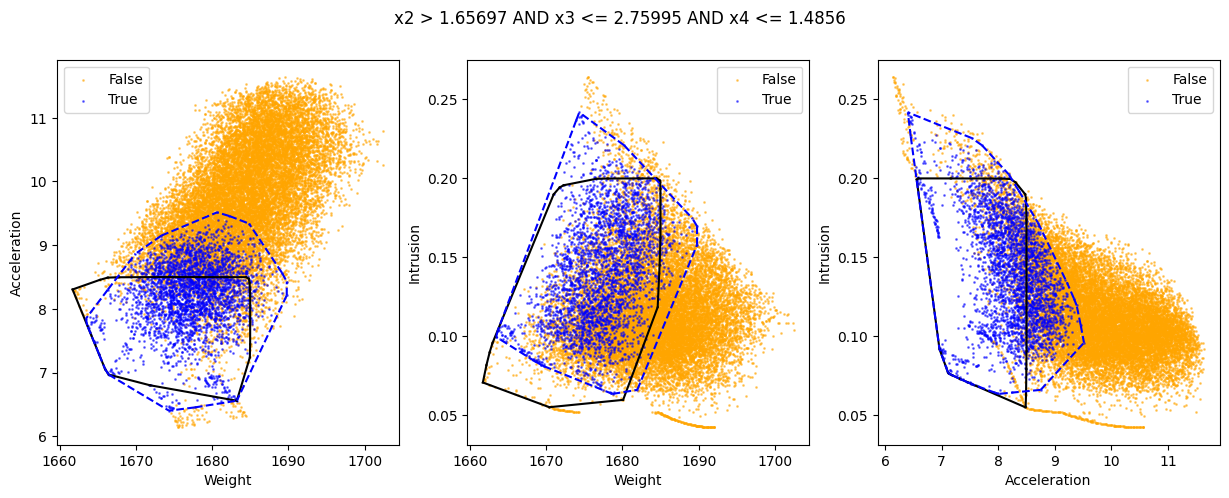

In [3]:
plot_helper(rules, [0], df_crash, obj_names, target_category)

True positives  = 1230 / 2726
True negatives  = 17034 / 17274
False positives = 240 / 1470
False negatives = 1496 / 18530


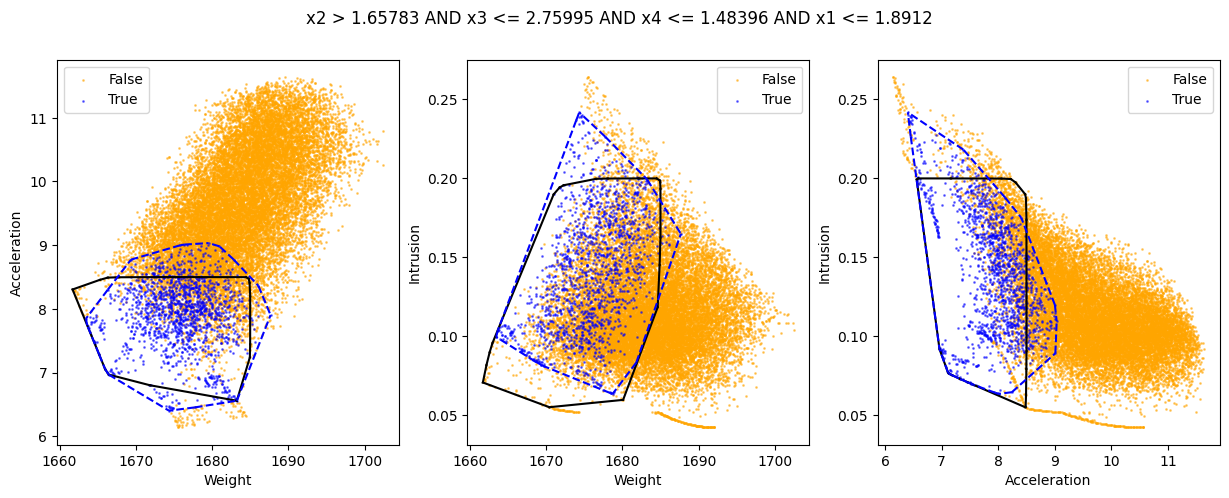

In [4]:
plot_helper(rules, range(9), df_crash, obj_names, target_category)

### Rulefit

In [5]:
rulefit_kwargs = {"tree_size": 8}
classifier = train_rulefit_rules(df_crash, var_names, target_category, classifier_kwargs=rulefit_kwargs)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x1 > 1.1038 and x4 > 1.29884 --> (0.7945, 0.008735991180468042)
1: x4 > 1.41815 --> (0.78, 0.0030879497253182824)
2: x4 > 1.42571 --> (0.7752, 0.016194135618307348)
3: x4 > 1.43065 --> (0.7725, 0.04060333447913298)
4: x4 > 1.43929 --> (0.76835, 0.024673710630346485)
5: x4 > 1.48389 --> (0.74585, 0.014870027061640282)
6: x4 > 1.4859 --> (0.7443, 0.0690017338758978)
7: x4 > 1.51186 --> (0.7318, 0.06407063719439955)
8: x4 > 1.51315 --> (0.73085, 0.02770026975564261)
9: x4 > 1.53829 --> (0.7198, 0.00010983928558727398)
10: x4 > 1.55466 --> (0.7126, 0.003694626604116356)
11: x1 > 1.28138 and x4 > 1.34285 --> (0.7017, 0.13025265285587873)
12: x4 > 1.57859 --> (0.70145, 0.00022654867355805704)
13: x4 > 1.5797 --> (0.7008, 0.008852144003439104)
14: x4 > 1.58271 --> (0.69925, 0.0002951799523555462)
15: x4 > 1.59615 --> (0.69155, 0.00885331461140238)
16: x4 > 1.59635 --> (0.6915, 0.005412957250005147)
17: x4 > 1.60704 --> (0.68665, 0.006628405676859884)
18: x4 >

True positives  = 106 / 2726
True negatives  = 3735 / 17274
False positives = 13539 / 13645
False negatives = 2620 / 6355


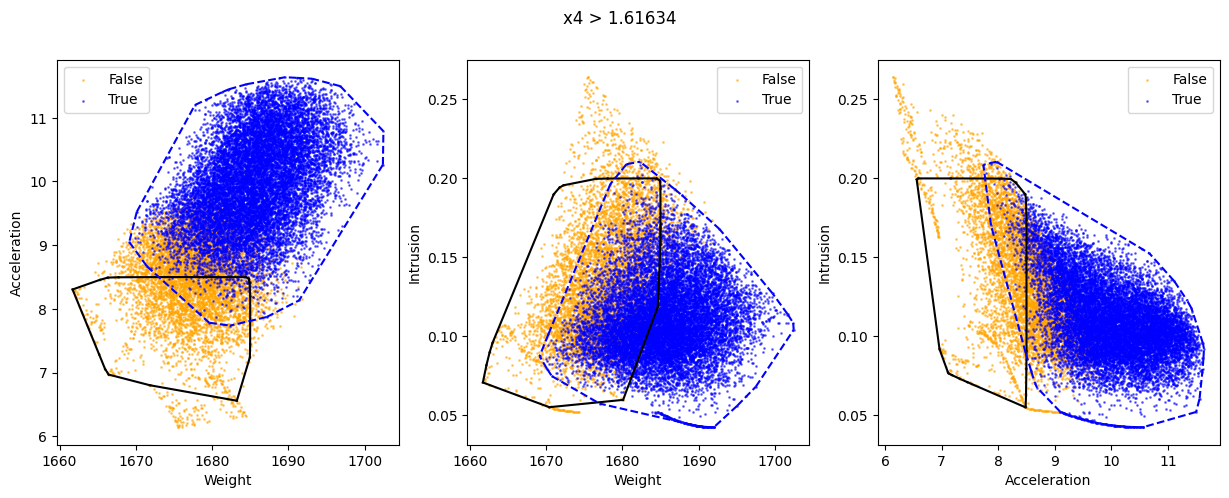

In [6]:
plot_helper(rules, [19, 20], df_crash, obj_names, target_category)

## Two-Bar Truss
### Skope-rules

In [15]:
df_twobar, var_names, obj_names = label_two_bar_truss("../data/TwoBarTruss.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, (len(var_names) + 1)*2),
                "precision_min": 0.1,
                "recall_min": 0.1,
                "bootstrap": True,
                "bootstrap_features": True,
                "max_samples": 0.90,
                "n_estimators": (len(var_names)+1)*10,
                "min_samples_split": 0.05,
                "max_depth_duplication": 10
               }
classifier = train_skope_rules(df_twobar, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall, F1-score)
0: x1 <= 0.00286 and x1 > 0.00077 and x2 <= 0.00527 and x2 > 0.00177 --> ('0.735', '0.760', '0.747')
1: x1 <= 0.0023 and x1 > 0.00088 --> ('0.415', '0.747', '0.533')
2: x1 <= 0.00283 and x1 > 0.00095 and y <= 2.31544 --> ('0.443', '0.654', '0.528')
3: x2 <= 0.00443 and x2 > 0.00195 and y <= 2.3415 --> ('0.270', '0.563', '0.365')
4: x2 <= 0.00497 and x2 > 0.00176 --> ('0.217', '0.833', '0.345')
5: x1 <= 0.00294 and x1 > 0.00088 and y > 2.25394 --> ('0.256', '0.232', '0.243')
6: y <= 2.36804 and y > 1.10824 --> ('0.112', '0.755', '0.196')
7: x2 <= 0.00434 and x2 > 0.00176 and y > 2.3343 --> ('0.180', '0.195', '0.187')


True positives  = 31 / 1553
True negatives  = 15774 / 15775
False positives = 1 / 32
False negatives = 1522 / 17296


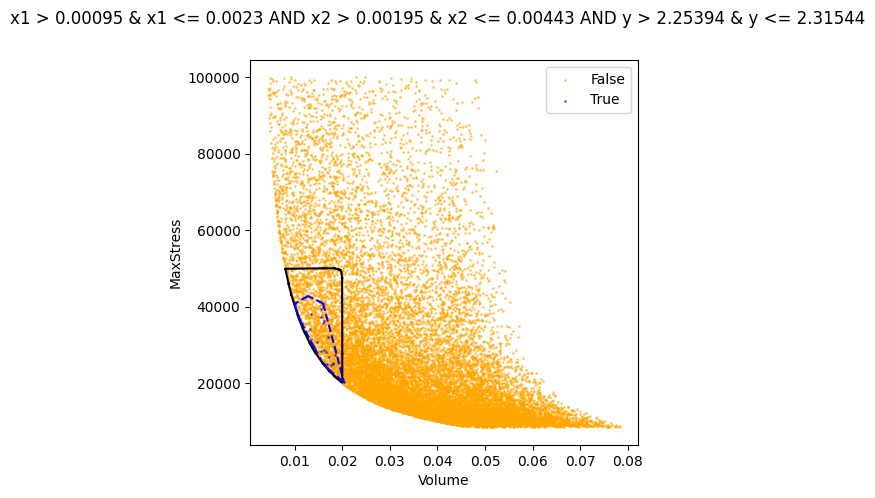

In [20]:
plot_helper(rules, range(7), df_twobar, obj_names, target_category)

In [113]:
plot_helper(rules, range(len(rules)), df_twobar, obj_names, target_category)

AttributeError: 'NoneType' object has no attribute 'groups'

### Rulefit

In [13]:
classifier = train_rulefit_rules(df_twobar, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x1 > 0.00191 --> (0.840027700831025, 0.02106986029418555)
1: x1 > 0.00228 --> (0.8011888273314867, 0.03257600748850236)
2: x1 > 0.00261 --> (0.7685826408125577, 0.09806733211832198)
3: x1 > 0.00263 --> (0.7665050784856879, 0.0618488728544562)
4: x1 > 0.00346 --> (0.6748614958448753, 0.13646966184582807)
5: x1 > 0.00353 --> (0.6678208679593721, 0.07169355554839281)
6: x1 > 0.00369 --> (0.6502192982456141, 0.03965628285399021)
7: x1 > 0.00377 --> (0.6420244690674054, 0.8754683741696221)
8: x2 > 0.00441 --> (0.6087257617728532, 0.1639522876302738)
9: x1 <= 0.00227 and x1 > 0.00092 --> (0.1488342566943675, 0.007879888218413358)
10: x1 <= 0.00286 and x2 <= 0.0068 and x2 > 0.00176 --> (0.14768005540166204, 0.2535939733154101)
11: x1 <= 0.00327 and x2 <= 0.00535 and x2 > 0.00178 --> (0.1258079409048938, 0.07171766171041978)
12: x1 <= 0.00317 and x1 > 0.00086 and x2 <= 0.00581 and x2 > 0.0017 --> (0.12171052631578948, 0.16584924515762806)
13: x1 <= 0.00302 and

In [ ]:
rule = rules[10][0]

con = rule_to_conditions(rule)
df_twobar["mark"] = df_twobar.apply(con, axis=1)

plot_rule_explanations(df_twobar, obj_names, "mark", "category", target_category, title=rule)

## Welded beam
### Skope rules

In [ ]:
df_beam, var_names, obj_names = label_welded_beam("../data/WeldedBeam.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_beam, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

In [ ]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_beam["skope_mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [ ]:
classifier = train_rulefit_rules(df_beam, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

In [ ]:
rule = rules[4][0]

con = rule_to_conditions(rule)
df_beam["mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "mark", "category", target_category, title=rule)